In [36]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, roc_curve, auc, accuracy_score
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

---

In [3]:
eval = sns.load_dataset('mpg')

df = sns.load_dataset('mpg')

df1 = df.copy()

df2 = sns.load_dataset('titanic')

df3 = sns.load_dataset('titanic')

df4 = sns.load_dataset('titanic')

In [4]:
eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


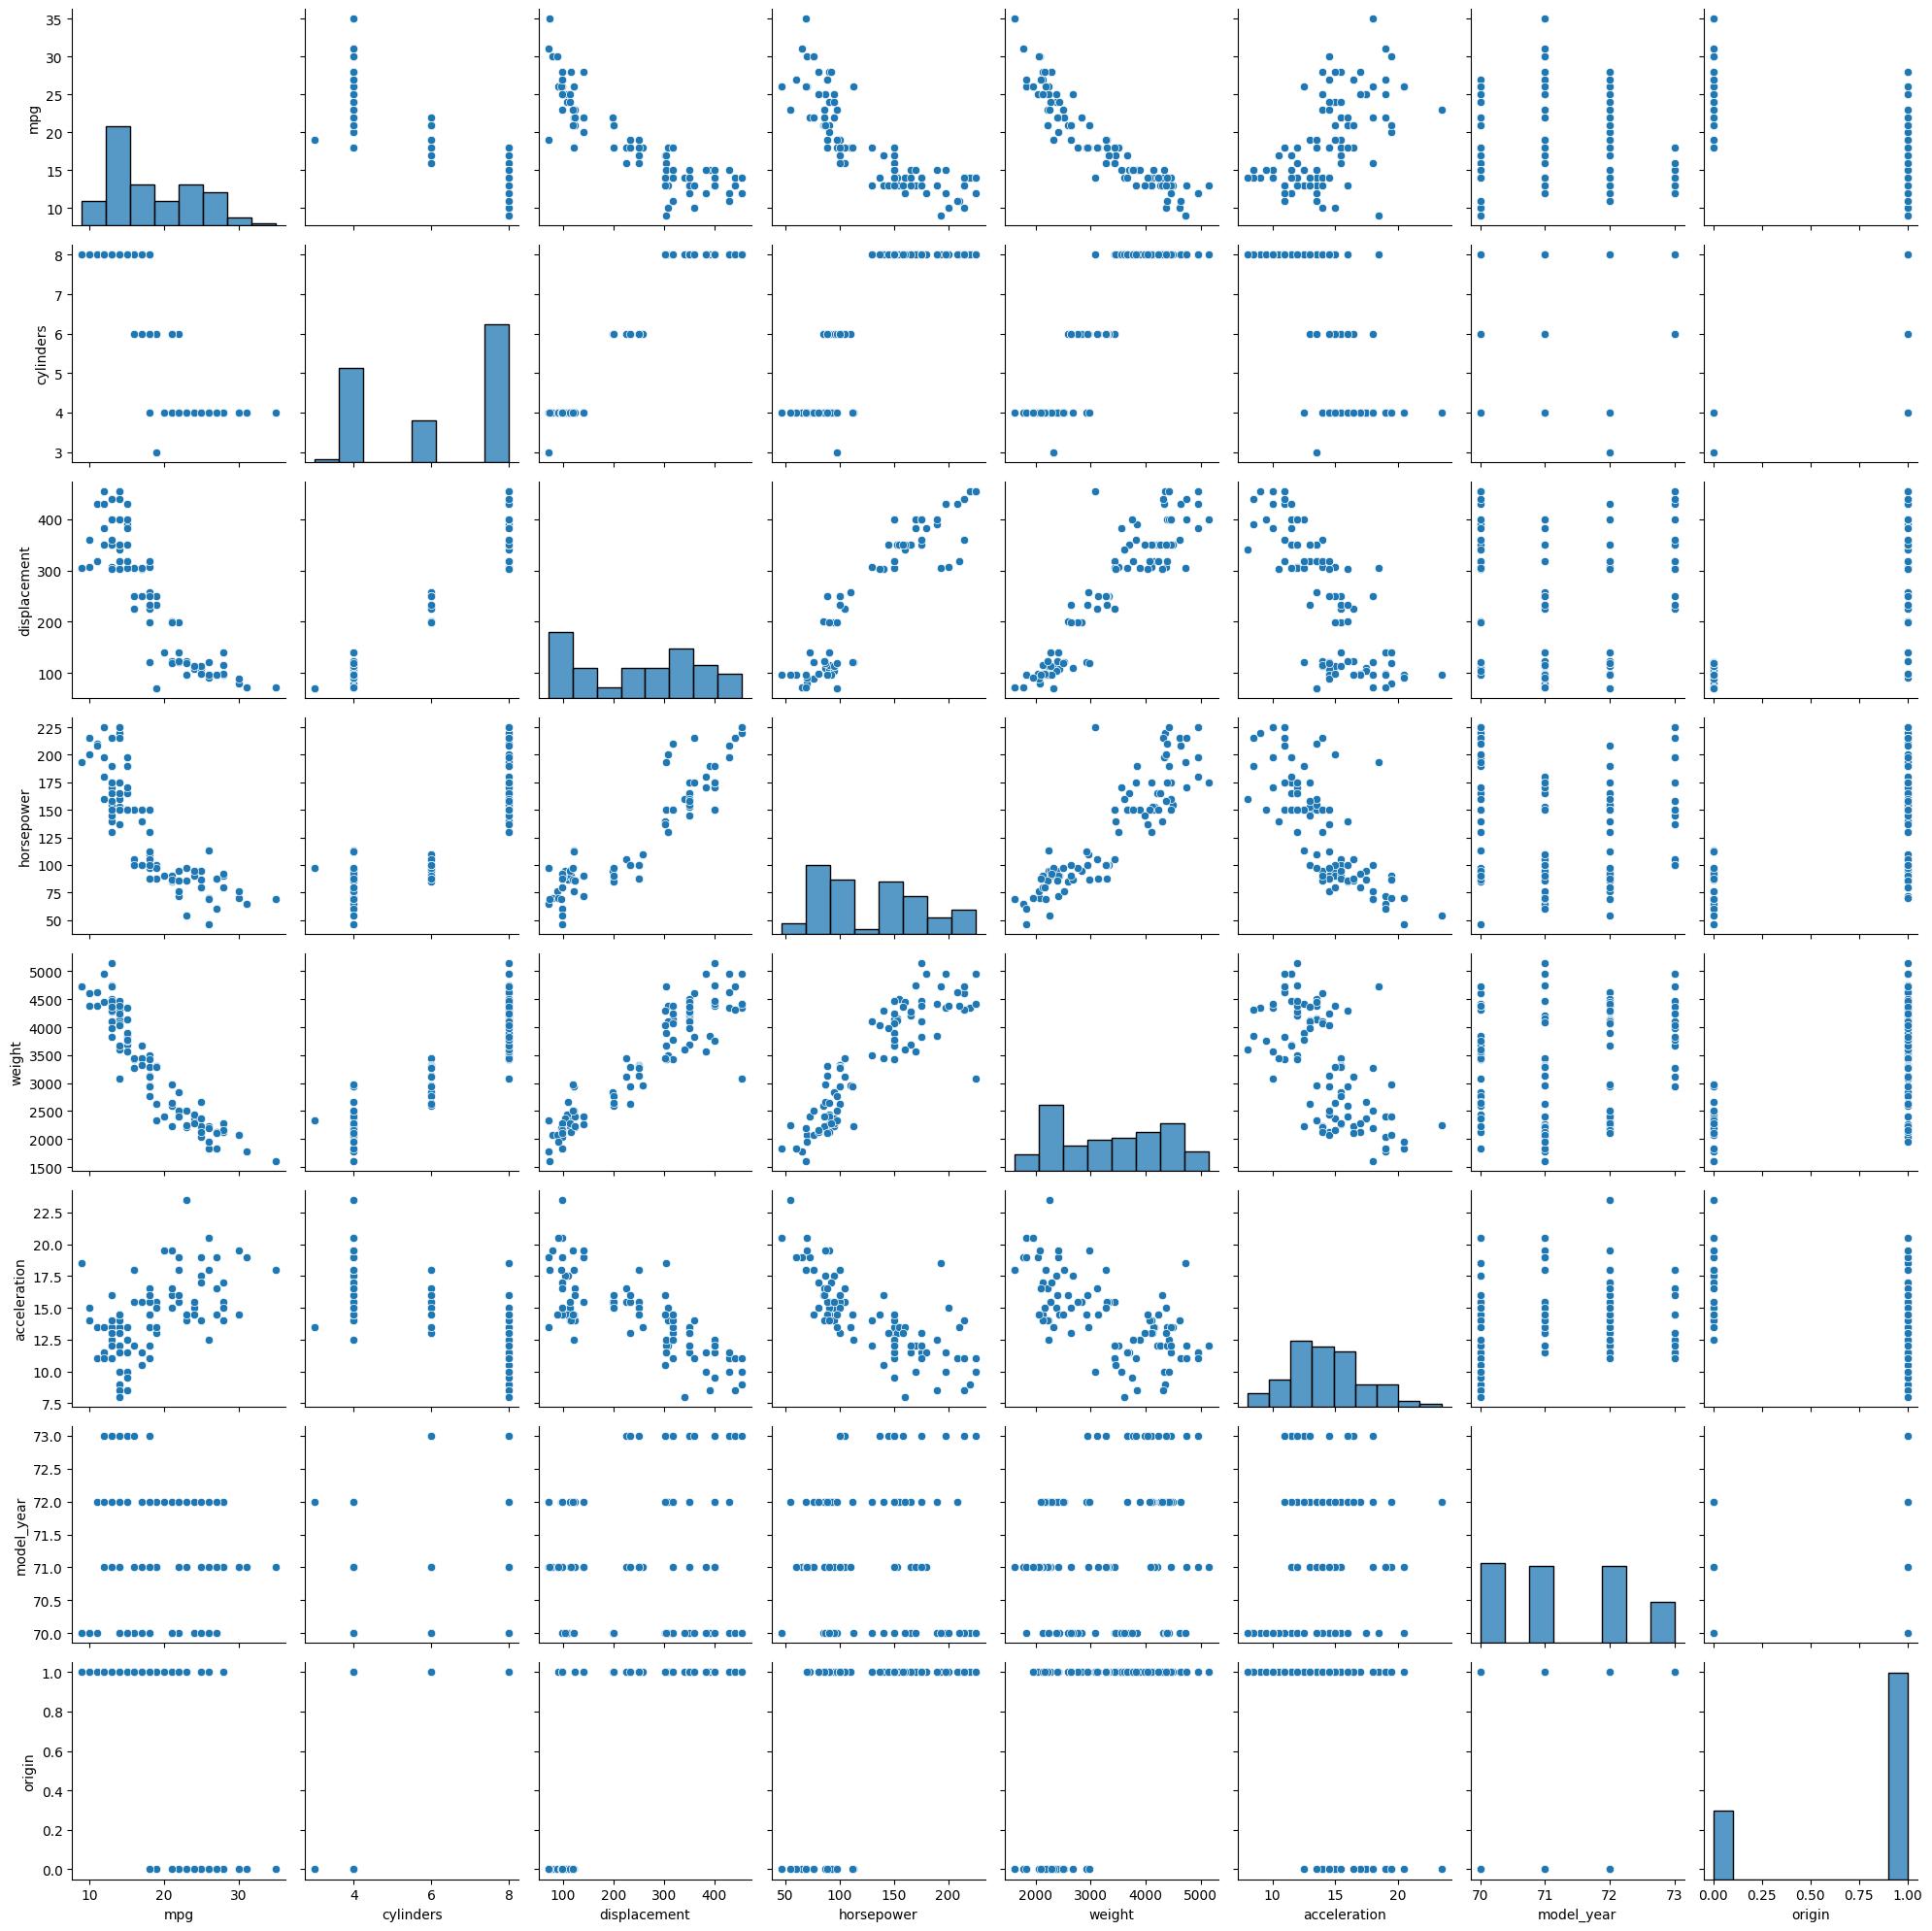

In [5]:
eval['origin'] = eval['origin'].apply(lambda x: 1 if x == 'usa' else 0)

sns.pairplot(eval.head(100), height=2.5)
plt.tight_layout()

---

##Linear Regression

In [6]:
df = df.dropna()
df = df.drop('name', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


In [7]:
df.corr()['mpg']

<ipython-input-7-5dfaa8b02de7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mpg']


mpg             1.000000
cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
model_year      0.580541
Name: mpg, dtype: float64

In [8]:
df.corr()['weight']

<ipython-input-8-3c9432b38d2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['weight']


mpg            -0.832244
cylinders       0.897527
displacement    0.932994
horsepower      0.864538
weight          1.000000
acceleration   -0.416839
model_year     -0.309120
Name: weight, dtype: float64

In [9]:
df['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# convert the target
df['origin'] = df['origin'].apply(lambda x: 1 if x == 'usa' else 0)

# Split your data
X = df[['weight', 'model_year', 'acceleration', 'origin']]
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

# Define the Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Fit pipeline on training data
pipeline.fit(X_train, y_train)
print("Training Score: ", pipeline.score(X_train, y_train),'\n')

Training Score:  0.8248286769181413 



In [11]:
### Analyze Performance:

# Make predictions
y_pred = pipeline.predict(X_test)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R^2): %.2f'
      % metrics.r2_score(y_test, y_pred), '\n')

# The coefficients
print('Coefficients: \n', pipeline.named_steps['model'].coef_, '\n')

# The mean squared error
print('Mean squared error (MSE): %.2f'
      % metrics.mean_squared_error(y_test, y_pred), '\n')

# Calculate and print RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}", '\n')

# Calculate and print MAE
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (RAE): {mae:.2f}")

Coefficient of determination (R^2): 0.79 

Coefficients: 
 [-4.90413373  2.89243262  0.18876834 -1.24869913] 

Mean squared error (MSE): 10.72 

Root Mean Squared Error (RMSE): 3.27 

Mean Absolute Error (RAE): 2.52


cross_val_score:

In [12]:
# Create a new model
model_cv = LinearRegression()

# Use cross_val_score, we'll use 5-fold CV here
scores = cross_val_score(model_cv, X, y, cv=5, scoring='neg_mean_squared_error')

# Take square root of the scores to get RMSE, also negate the scores because they're negative
rmse_scores = np.sqrt(-scores)

print(f"Cross-Validated RMSE Scores: {rmse_scores}")
print(f"Mean Cross-Validated RMSE: {np.mean(rmse_scores):.2f}")

Cross-Validated RMSE Scores: [3.93583634 3.16686597 2.53416001 4.02794717 5.30878364]
Mean Cross-Validated RMSE: 3.79


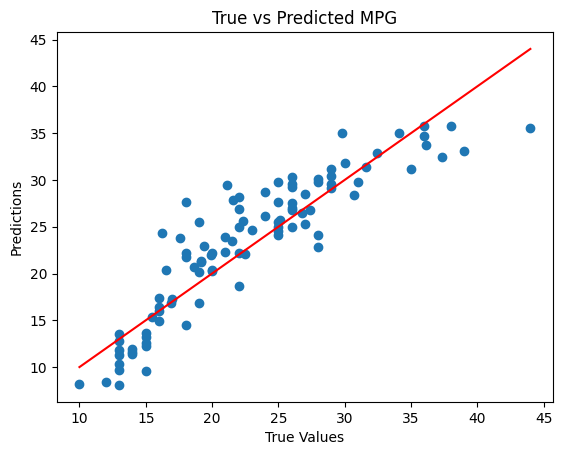

In [13]:
# Visualize
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted MPG')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # a diagonal line representing perfect predictions
plt.show()

##Logistic Regression

In [14]:
df1['origin'].value_counts(normalize=True)

usa       0.625628
japan     0.198492
europe    0.175879
Name: origin, dtype: float64

In [15]:
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


---

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# convert the target
df1['origin'] = df1['origin'].apply(lambda x: 1 if x == 'usa' else 0)


# Split your data
X = df[['weight', 'model_year', 'acceleration', 'mpg']]
y = df['origin'] # Now 'origin' is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

# Define the Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

# Fit pipeline on training data
pipeline.fit(X_train, y_train)
print("Training Score: ", pipeline.score(X_train, y_train),'\n')

# Make predictions
y_pred = pipeline.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print the model coefficients
print('Coefficients: \n', pipeline.named_steps['model'].coef_, '\n')

# Cross validation
model_cv = LogisticRegression()
scores = cross_val_score(model_cv, X, y, cv=5, scoring='accuracy')

print(f"Cross-Validated Accuracy Scores: {scores}")
print(f"Mean Cross-Validated Accuracy: {np.mean(scores):.2f}")


Training Score:  0.7959183673469388 

              precision    recall  f1-score   support

           0       0.81      0.71      0.75        41
           1       0.81      0.88      0.84        57

    accuracy                           0.81        98
   macro avg       0.81      0.79      0.80        98
weighted avg       0.81      0.81      0.80        98

Coefficients: 
 [[ 1.25989171  0.53602525 -0.16062951 -1.05894228]] 

Cross-Validated Accuracy Scores: [0.81012658 0.78481013 0.78205128 0.82051282 0.48717949]
Mean Cross-Validated Accuracy: 0.74


## Decision Tree

In [17]:
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [19]:
dropped_columns = ['deck', 'alive']
df2 = df2.drop(columns=dropped_columns)
df2 = df2.dropna()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define variables
X = df2.drop('survived', axis=1)
y = df2['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)


# Define preprocessing for Numeric & Categorical columns for X Features
numeric_features = X.select_dtypes('number').columns
categorical_features = X.select_dtypes('object').columns


# Define preprocessing for Numeric & Categorical columns (scale them)
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


# Create the pipeline (preprocessing and model)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=3))
    ])


# Use the pipeline to fit and predict
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)


# Now you can assess the accuracy of the model
print("Model Accuracy: %.3f" % accuracy_score(y_test, pred))

Model Accuracy: 0.764


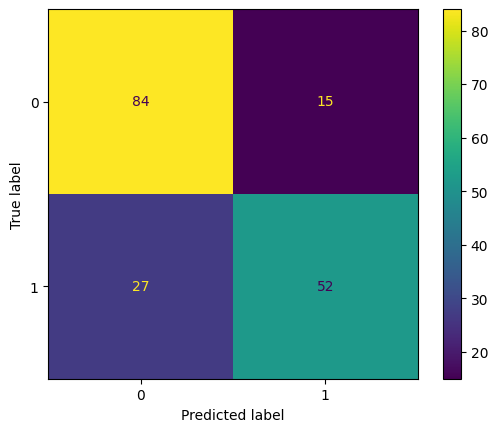

In [21]:
# Create confusion matrix
cm = confusion_matrix(y_test, pred)

# Create a ConfusionMatrixDisplay instance
cm_display = ConfusionMatrixDisplay(cm).plot()

plt.show()

## KNN (K Nearest Neighbors)

In [22]:
df3.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [24]:
dropped_columns = ['deck', 'alive']
df3 = df3.drop(columns=dropped_columns)
df3 = df3.dropna()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer


# Define
X = df3.drop('survived', axis=1)
y = df3['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)



# Define preprocessing for Numeric & Categorical columns for X Features
numerical_features = X.select_dtypes('number').columns
categorical_features = X.select_dtypes('object').columns


# Define preprocessing for Numeric & Categorical columns (scale them)
numerical_transformer = MinMaxScaler() ## MinMaxScaler for KNN distance model*******
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # Doesnt need to do this ****


# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
])


# Create the pipeline (preprocessing and model)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', KNeighborsClassifier(n_neighbors=3, metric='euclidean'))
])


# Use the pipeline to fit and predict
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)

print("Model Accuracy: %.3f" % accuracy_score(y_test, pred))

Model Accuracy: 0.764


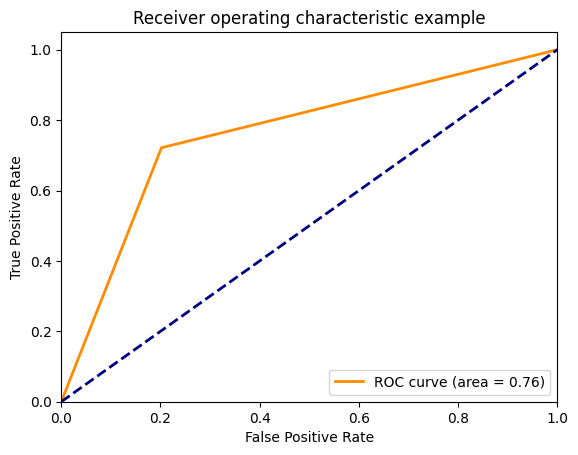

In [38]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


## Random Forest

In [27]:
df4.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [28]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [29]:
dropped_columns = ['deck', 'alive']
df4 = df4.drop(columns=dropped_columns)
df4 = df4.dropna()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier



# Define variables
X = df4.drop('survived', axis=1)
y = df4['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)


# Define preprocessing for Numeric & Categorical columns for X Features
numeric_features = X.select_dtypes('number').columns
categorical_features = X.select_dtypes('object').columns


# Define preprocessing for Numeric & Categorical columns (scale them)
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


# Create the pipeline (preprocessing and model)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
    ])


# Use the pipeline to fit and predict
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)


# Now you can assess the accuracy of the model
print("Model Accuracy: %.3f" % accuracy_score(y_test, pred))

Model Accuracy: 0.792


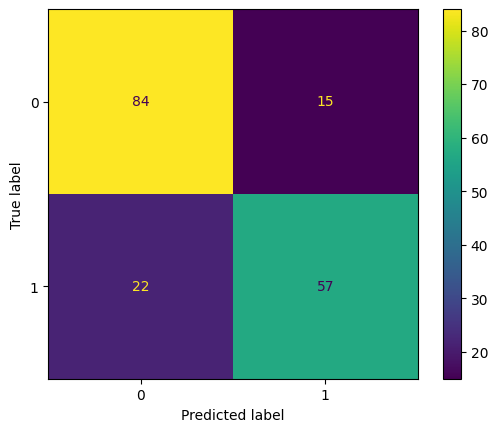

In [31]:
# Create confusion matrix
cm = confusion_matrix(y_test, pred)

# Create a ConfusionMatrixDisplay instance
cm_display = ConfusionMatrixDisplay(cm).plot()

plt.show()

## Recc Systems

In [32]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811633 sha256=a334f6b1908a697f54a15575c0d6ced82e3d8ad29691865a471c151496e8718a
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [35]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import accuracy


# Data Loading and Preprocessing
data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=.25, random_state=42)


# Model Training
algo = SVD()
algo.fit(trainset)


# Prediction
# Predict ratings for all pairs (u, i) that are NOT in the training set.
predictions = algo.test(testset)


# Evaluation
# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9368


0.9367989385963661

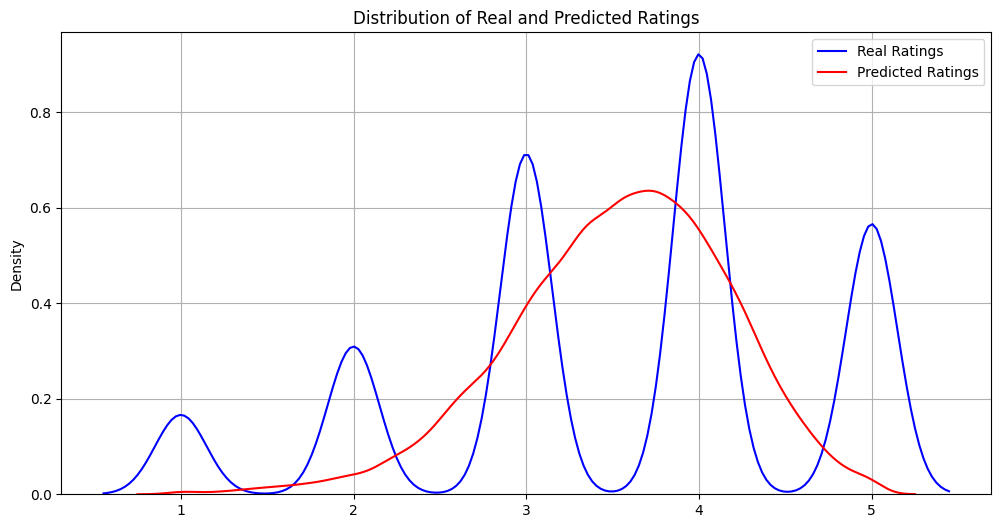

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# get the list of the ratings
real_ratings = [pred.r_ui for pred in predictions]
predicted_ratings = [pred.est for pred in predictions]

# plot
plt.figure(figsize=(12, 6))
sns.kdeplot(real_ratings, color='b', label='Real Ratings')
sns.kdeplot(predicted_ratings, color='r', label='Predicted Ratings')
plt.title('Distribution of Real and Predicted Ratings')
plt.legend()
plt.grid(True)
plt.show()
